# 词云图

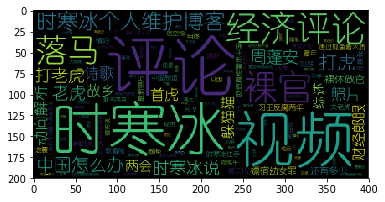

In [1]:
import matplotlib.pylab as plb
import numpy as npy
import pandas as pda
import pymysql
import wordcloud as wc

conn = pymysql.connect(host='127.0.0.1', user='root', passwd='root', db='hexun')
sql1 = 'select name from myhexun'
cur = conn.cursor()
cur.execute(sql1)

'''词语1 词语2 词语3'''
name = " "
for i in cur:
    name = name + str(i[0]) + ''
    
# 选择字体的位置
font = r'C:\WINDOWS\Fonts\SIMYOU.TTF'

# collocations=False 相同词语合并
# generate词语素材
mymc = wc.WordCloud(collocations=False, font_path=font).generate(name)

# imshow词云放入
plb.imshow(mymc)
plb.show()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\liyuc\AppData\Local\Temp\jieba.cache
Loading model cost 0.623 seconds.
Prefix dict has been built succesfully.


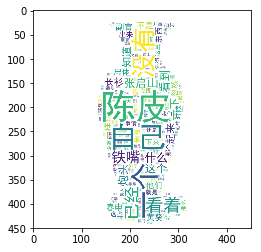

In [2]:
import wordcloud as wc
import matplotlib.pylab as plb
import jieba
from PIL import Image
from numpy import array

path = 'E:/JetBrains/PyCharm Community Edition 2017.2.3/project/老九门.txt'
data = open(path, 'rb').read()

# jieba模块进行分词
cutdata = jieba.cut(data)
alldata = ''
for i in cutdata:
    alldata = alldata + ' ' + str(i)
font = r'C:\WINDOWS\Fonts\simhei.ttf'

# 打开图片，并转为array
cat = Image.open('C:/Users/liyuc/Pictures/1.jpg')
catarry = array(cat)

# mask= 图片转成的array导入 
mywc = wc.WordCloud(collocations=False, font_path=font, mask=catarry, background_color='white').generate(alldata)
plb.imshow(mywc)
plb.show()


# 热力图

In [1]:
import json
import folium
from folium.plugins import HeatMap

alldata = []
lat = []
lng = []
count = []
with open('E:/JetBrains/PyCharm Community Edition 2017.2.3/project/Lnglat.json', 'r') as file:
    while file.readline():
        line = file.readline()
        data = json.loads(line[:len(line) - 3])
        lat.append(data['lat'])
        lng.append(data['lng'])
        count.append(data['count'])

# 数据格式[[lat,lng,count][lat,lng,count]...]
for i in range(0, len(lat)):
    alldata.append([float(lat[i]), float(lng[i]), count[i]])
print(alldata)

hmap = folium.Map()
HeatMap(alldata).add_to(hmap)
hmap.save('.//hotmap.html')

[[39.999497, 116.276887, 1718], [39.942341, 116.393097, 466], [40.01629, 116.314607, 900], [39.999061, 116.396015, 550], [39.903732, 116.404547, 594], [39.949373, 116.390595, 232], [39.887976, 116.417313, 130], [39.94015, 116.398287, 130], [39.873539, 116.500803, 596], [39.925467, 116.312768, 230], [39.947983, 116.34331, 138], [39.873144, 116.505076, 206], [40.348353, 115.994028, 54], [40.000484, 116.404487, 32], [39.95032, 116.347505, 66], [39.816749, 116.2937, 256], [39.904648, 116.404651, 10], [40.295477, 116.081732, 78], [39.50183, 116.342645, 430], [39.807655, 116.486212, 4], [39.952927, 116.420453, 12], [40.002368, 116.396589, 496], [39.896121, 116.393596, 16], [39.841719, 116.359809, 1476], [40.659378, 117.281931, 48], [39.835053, 116.308106, 288], [39.990016, 116.506341, 62], [40.242643, 116.337745, 212], [40.650895, 117.267356, 328], [39.970403, 116.609309, 12], [39.915291, 116.403857, 62], [39.999316, 116.396684, 12], [40.020199, 116.563715, 79], [39.884489, 116.399221, 34], 